Original dimensions: 5583 3496
New dimensions: (1000, 626, 3)


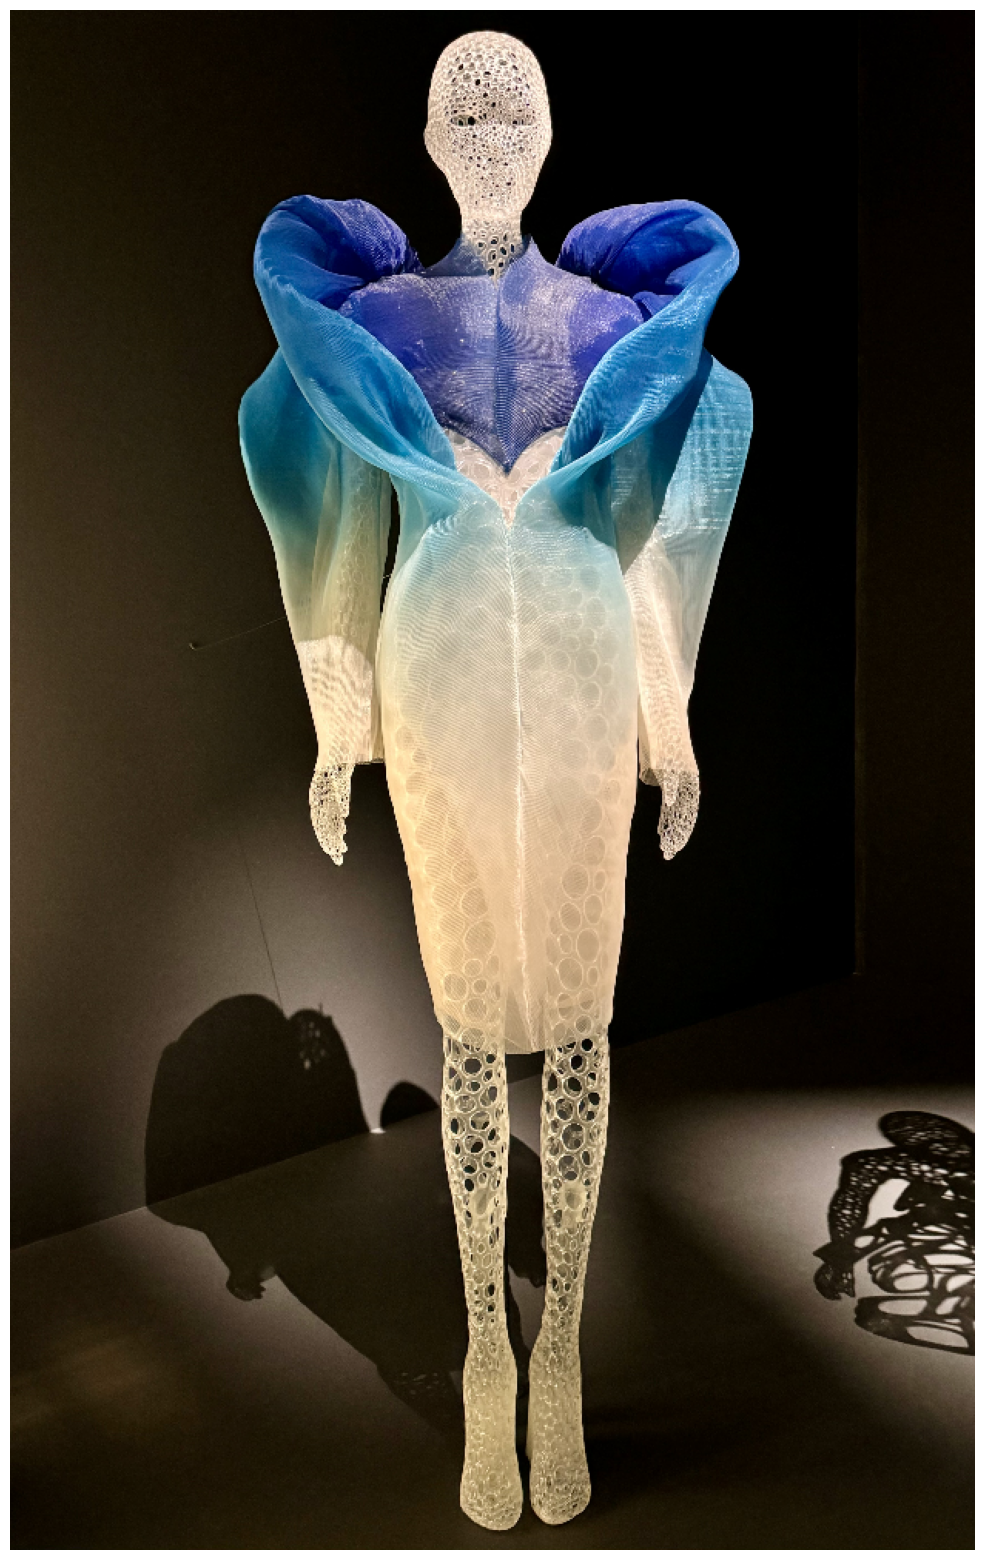

In [1]:
# Before beginning, when creating a new virtual environment:
# Activate cv_project virtual environment
# Install opencv, numpy, jupyter, and matplotlib packages
# Install ipykernel, and run:
# python -m ipykernel install --user --name="CV" --display-name="Computer Vision Project"
# Open Jupyter

import numpy as np
import sys
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

def change_size(path, max_dim):
    img = cv2.imread(path)
    if img is None:
        raise ValueError("Image not found or could not be loaded")

    height, width = img.shape[:2]
    print('Original dimensions:', height, width)
    
    scale = min(max_dim/width, max_dim/height)
    if scale < 1:
        new_width = int(width*scale)
        new_height = int(height*scale)
        img = cv2.resize(img, (new_width, new_height))
        print('New dimensions:', img.shape)

    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return(img)

image = change_size('Iris_Van_Herpen_Sculpting_the_Senses_exhibition_at_QGOMA,_2024,_09.jpg', 1000)
image_rgb = image
#image_cmyk = image

#print("Before display:", img.shape)  # Check final image shape
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111)
ax.imshow(image_rgb)
ax.set_axis_off()
#plt.subplots_adjust(top=1, bottom=0, right=1, left=0, hspace=0, wspace=0)
plt.margins(0,0)
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())
plt.show()

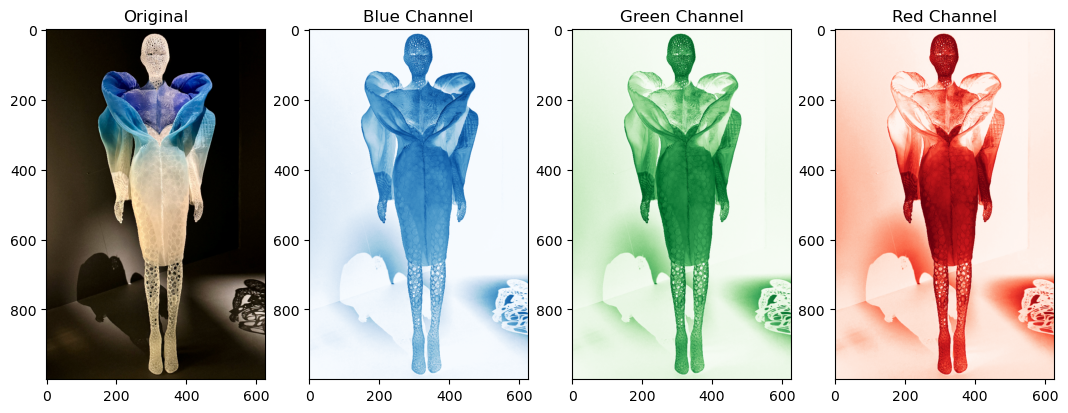

In [6]:
# Now splitting RGB instead of BGR
R, G, B = cv2.split(image_rgb)  # Note the order change here
plt.figure(figsize=(13,5))

plt.subplot(141)
plt.imshow(image_rgb)  # No need for cvtColor since it's already RGB
plt.title('Original')

plt.subplot(142)
plt.imshow(B, cmap='Blues')
plt.title('Blue Channel')
#plt.subplot(242)
#plt.imshow(B, cmap='Blues_r')
#plt.title('Reversed Blue Channel')

plt.subplot(143)
plt.imshow(G, cmap='Greens')
plt.title('Green Channel')
#plt.subplot(243)
#plt.imshow(G, cmap='Greens_r')
#plt.title('Reversed reen Channel')

plt.subplot(144)
plt.imshow(R, cmap='Reds')
plt.title('Red Channel')
#plt.subplot(244)
#plt.imshow(R, cmap='Reds_r')
#plt.title('Reversed Red Channel')

plt.show()

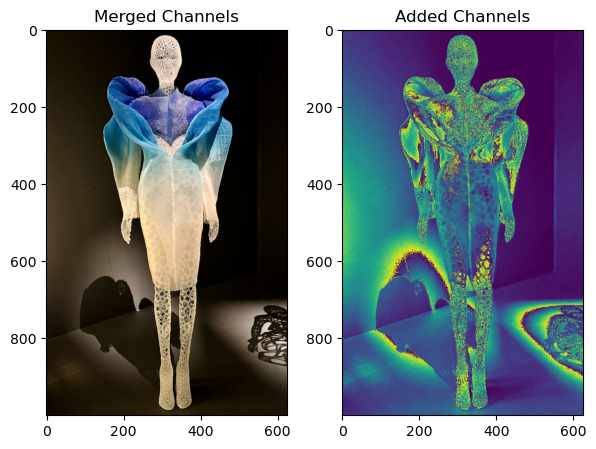

In [7]:
# Simply adding the channels back together results in an intensity heat map
added_channels = R + B + G
# To get the original image back, we need to instead merge the color channels back together
merged_image = cv2.merge([R, G, B])

plt.figure(figsize=(7,5))

#print(zero_channel.shape)
plt.subplot(121)
plt.imshow(merged_image)
plt.title('Merged Channels')

plt.subplot(122)
plt.imshow(added_channels)
plt.title('Added Channels')

plt.show()

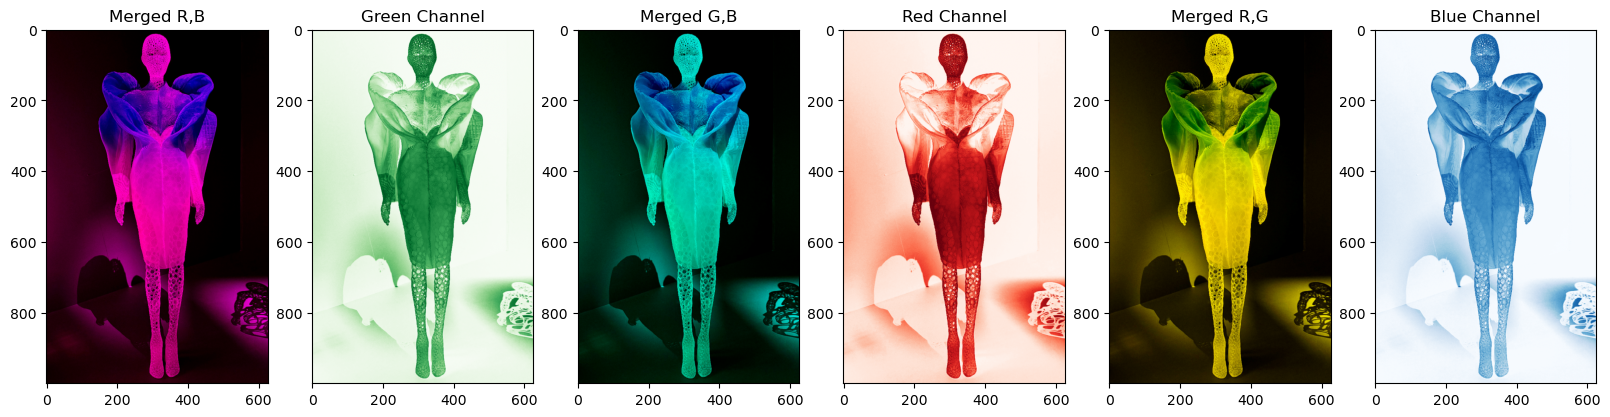

In [16]:
# Contrasting merged channels with channel that was left out
# the zeroed chennel needs to be the same size as the image
zero_channel = np.zeros_like(R)

plt.figure(figsize=(20,5))

plt.subplot(161)
plt.imshow(cv2.merge([R,zero_channel,B]))
plt.title('Merged R,B')

plt.subplot(162)
plt.imshow(G, cmap='Greens')
plt.title('Green Channel')

plt.subplot(163)
plt.imshow(cv2.merge([zero_channel,G,B]))
plt.title('Merged G,B')

plt.subplot(164)
plt.imshow(R, cmap='Reds')
plt.title('Red Channel')

plt.subplot(165)
plt.imshow(cv2.merge([R,G,zero_channel]))
plt.title('Merged R,G')


plt.subplot(166)
plt.imshow(B, cmap='Blues')
plt.title('Blue Channel')

plt.show()

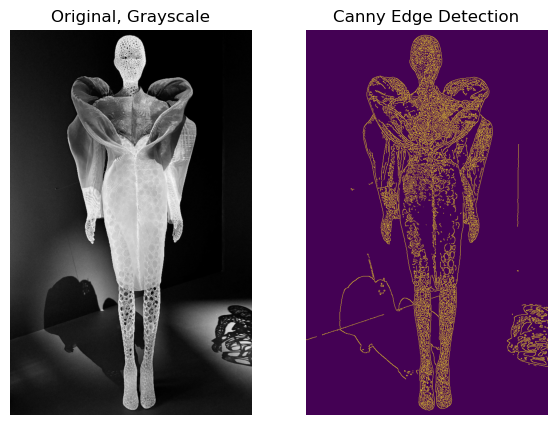

In [41]:
gray_rgb = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)

edges = cv2.Canny(gray_rgb, 60,100)

plt.figure(figsize=(7,5))

# Note, RGB2GRAY creates a single channel matrix whereas matplotlib expects
# 3 channels. So, we need to explicitly display in cmap = 'gray'
plt.subplot(121)
plt.imshow(gray_rgb, cmap = 'gray', vmin = 0, vmax = 255)  # No need for cvtColor since it's already RGB
plt.title('Original, Grayscale')
plt.axis('off')

plt.subplot(122)
plt.imshow(edges)  # No need for cvtColor since it's already RGB
plt.title('Canny Edge Detection')
plt.axis('off')
plt.show()